In [6]:
import cv2
from face_recognition import faceRecognitionPipeline

In [7]:
import matplotlib.pyplot as plt

# Face recogintion prediction

In [8]:
pred_img ,pred_dict = faceRecognitionPipeline("./test_images/getty_test4.jpg")

In [9]:
pred_dict

[{'roi': array([[0.22352941, 0.22745098, 0.21960784, ..., 0.16078431, 0.18431373,
          0.28627451],
         [0.21960784, 0.20392157, 0.21568627, ..., 0.17254902, 0.23921569,
          0.2745098 ],
         [0.20784314, 0.2       , 0.21176471, ..., 0.29019608, 0.22352941,
          0.23921569],
         ...,
         [0.47843137, 0.4745098 , 0.45098039, ..., 0.48235294, 0.43529412,
          0.50196078],
         [0.51372549, 0.45490196, 0.42352941, ..., 0.91372549, 0.66666667,
          0.56470588],
         [0.49803922, 0.48627451, 0.44313725, ..., 0.98823529, 0.87843137,
          0.59215686]], shape=(54, 54)),
  'eig_img': array([[-0.19021232, -0.20224163, -0.1993939 , ...,  0.34511435,
           0.31850352,  0.29131461]], shape=(1, 10000)),
  'prediction_name': 'male',
  'score': np.float64(0.6392465273175403)},
 {'roi': array([[0.11764706, 0.11764706, 0.1254902 , ..., 0.21960784, 0.23137255,
          0.23529412],
         [0.11372549, 0.1254902 , 0.14509804, ..., 0.2039215

In [10]:
cv2.imshow("Prediction image", pred_img) 
cv2.waitKey(0) 
cv2.destroyAllWindows()


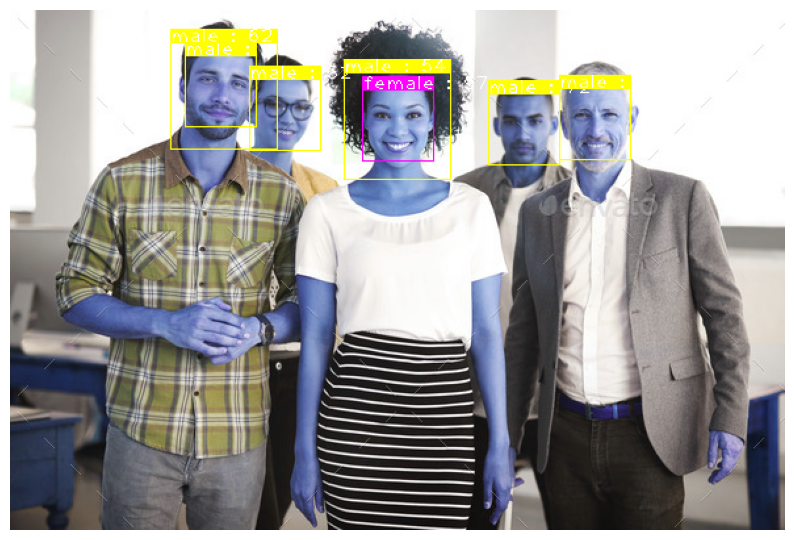

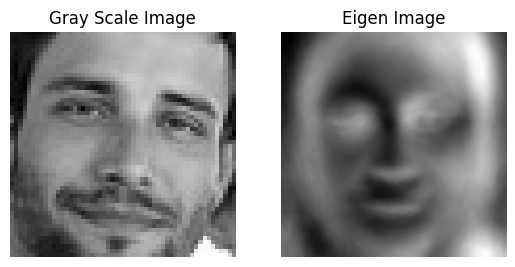

predicted gender =  male
predicted Score=63.92%
----------------------------------------------------------------------------------------------------


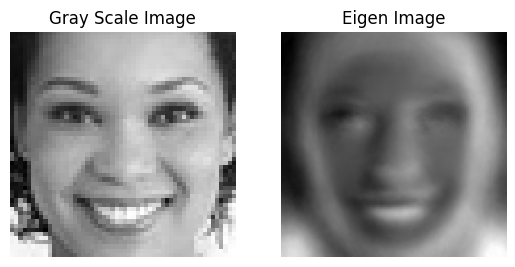

predicted gender =  female
predicted Score=97.55%
----------------------------------------------------------------------------------------------------


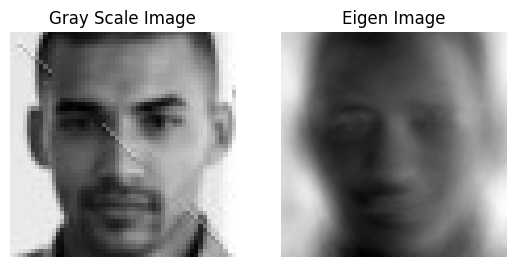

predicted gender =  male
predicted Score=72.26%
----------------------------------------------------------------------------------------------------


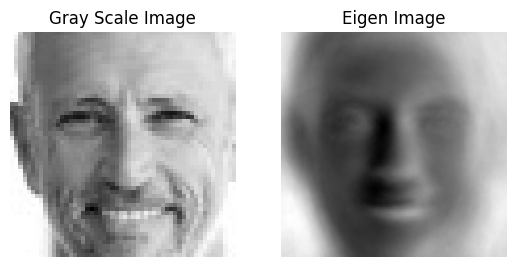

predicted gender =  male
predicted Score=55.56%
----------------------------------------------------------------------------------------------------


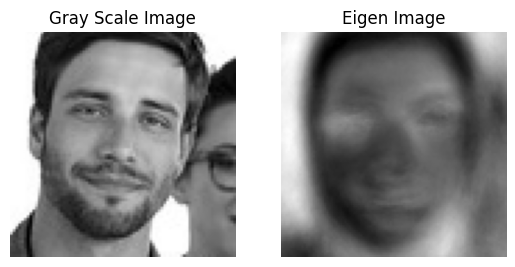

predicted gender =  male
predicted Score=62.98%
----------------------------------------------------------------------------------------------------


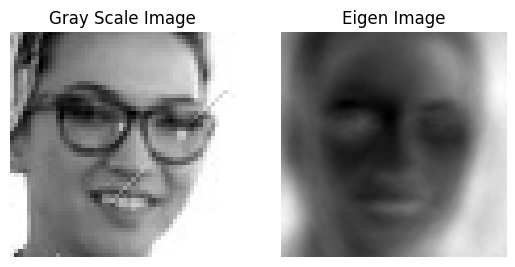

predicted gender =  male
predicted Score=52.80%
----------------------------------------------------------------------------------------------------


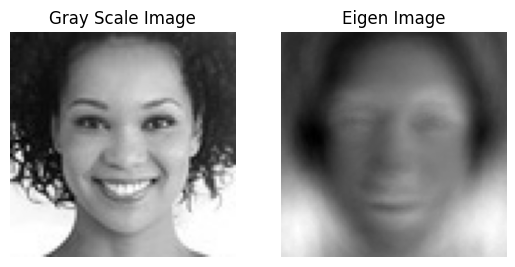

predicted gender =  male
predicted Score=54.50%
----------------------------------------------------------------------------------------------------


In [11]:
img_rgb= cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(pred_img)
plt.axis('off')
plt.show()

# Generate report 
# Generate report 
for i in range(len(pred_dict)):
    obj_gray = pred_dict[i]['roi']
    # Fix the reshaping issue
    obj_eig = pred_dict[i]['eig_img'].reshape(100, 100)  # Adjust dimensions as needed
    plt.subplot(1, 2, 1)
    plt.imshow(obj_gray, cmap='gray')
    plt.title('Gray Scale Image')
    plt.axis('off')
    # Second 
    plt.subplot(1, 2, 2)
    plt.imshow(obj_eig, cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    plt.show()
    print('predicted gender = ', pred_dict[i]['prediction_name'])
    print('predicted Score={:0.2f}%'.format(pred_dict[i]['score'] * 100))

    print('-' * 100)

# ReAl Time Gender Recognition 

In [12]:
# 0-> access webcamera , 1-> external camera ,
cap = cv2.VideoCapture('./test_images/getty_test4.mp4')
while True:
    ret,frame = cap.read()

    if ret ==False:
        break
    pred_img,pred_dict=faceRecognitionPipeline(frame,path=False)
    cv2.imshow("Prediction image", pred_img)
    if cv2.waitKey(1)  == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()